# Setting up the Training data

in this section we will setup the training data by saving it to a pickle file<br>
In the next notebook we are able to load the pickle file and run the model on it <br>

We first load the ladel_image_male_training data AND label_image_female_training data

In [1]:
#here we open the two folderrs of male/female training data
#you might have to change the datadir or category based on the location the files are saved on your own local drive

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "DataSets/"

CATEGORIES = ["Label_Image_Male_Training", "Label_Image_Female_Training/"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category) #path to male/female)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)        ## makes it so that we only look at grey scale images (easier)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break
    
                        

<Figure size 640x480 with 1 Axes>

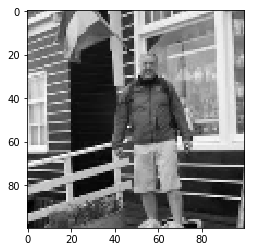

In [2]:
#reducing dimensions of image to still see if its a man
IMG_SIZE = 100

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap = "gray")
plt.show()

In [5]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)  #path to male/female)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:            
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)        ## DIT KIJKT ALLEEN NAAR ZWARTWIT!!!
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

    

In [6]:
#confirmes that training data got all images
#2 times 1361 images for man/female
print(len(training_data))

2522


In [7]:
#shuffling the data so network has to learn
import random
random.shuffle(training_data)

#shows if the first 10 pictures are labeled as male/female
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
1
0
1
0
1
1


In [8]:
X = [] #feature set
y = [] #labels

In [9]:
for features, label in training_data:
    X.append(features)
    y.append(label)
        

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1) #if we want color change last one to 3
#y = np.array()



In [10]:
#saving the training data so we can easily tweak hyperparameters
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [11]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)